In [14]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import h5py

In [2]:
# Open one month dataset
path = "../../data/test_2020_2022/202001.h5"
new = xr.open_dataset(path).fields

In [3]:
new

<xarray.DataArray 'fields' (phony_dim_0: 124, phony_dim_1: 20,
                            phony_dim_2: 721, phony_dim_3: 1440)>
[2574835200 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3

In [4]:
# Open 2018 dataset
ref = xr.open_dataset("../../data/out_of_sample/2019.h5").fields

In [5]:
ref

<xarray.DataArray 'fields' (phony_dim_0: 1460, phony_dim_1: 20,
                            phony_dim_2: 721, phony_dim_3: 1440)>
[30316608000 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3

In [6]:
var = 2

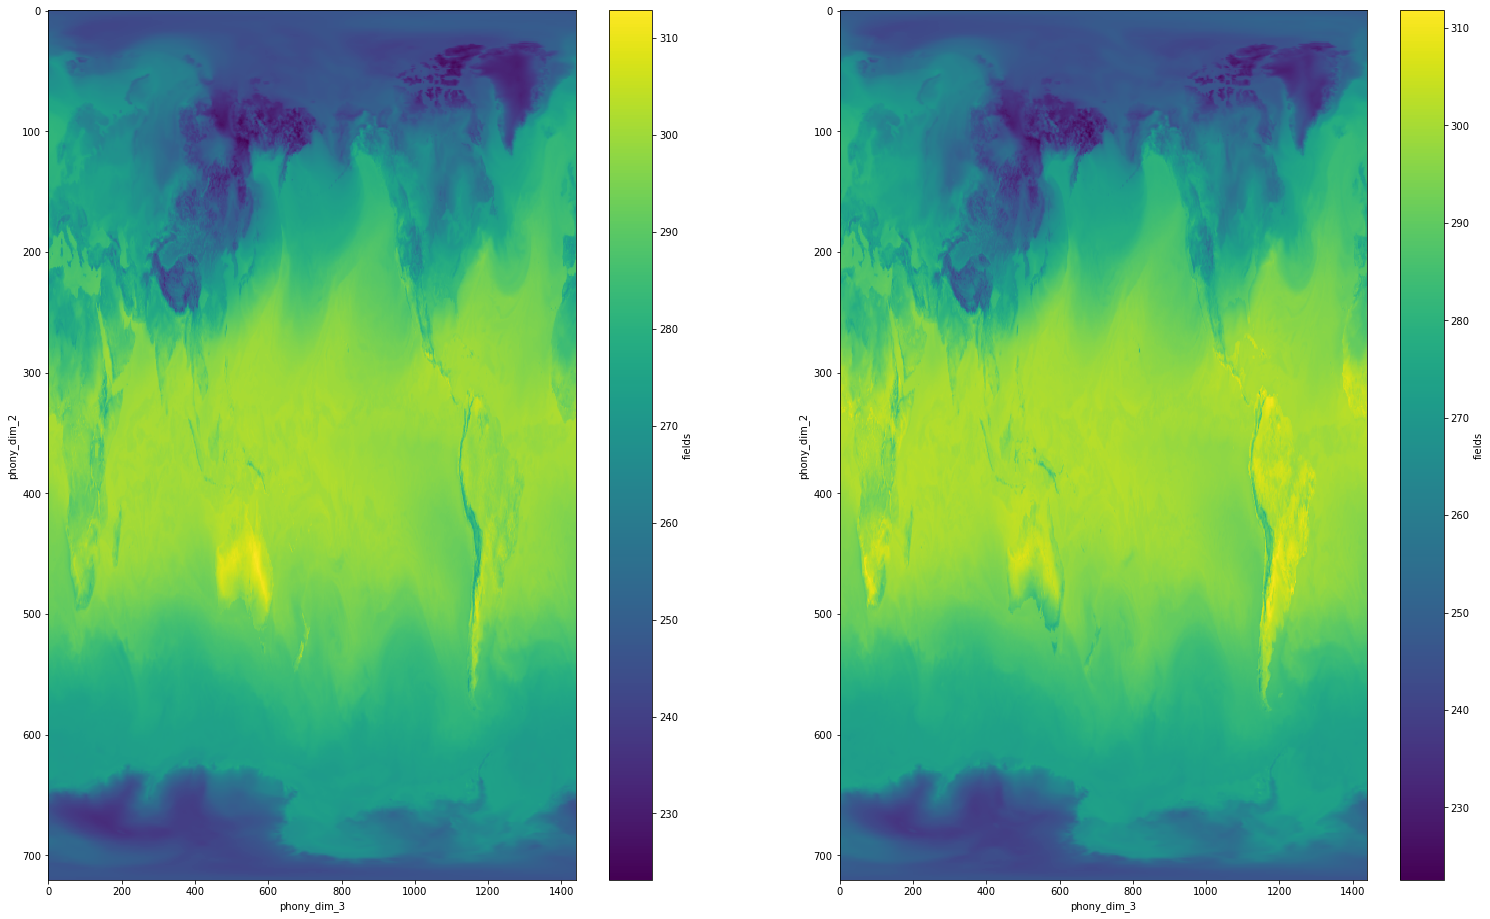

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (26,16))
im1 = new.isel(phony_dim_0 = 0, phony_dim_1 = var).plot(yincrease = False, ax = axs[0])
im2 = ref.isel(phony_dim_0 = 1459, phony_dim_1 = var).plot(yincrease = False, ax = axs[1])

## Land sea mask

In [8]:
sea_mask = np.load("../../data/stats_v0/land_sea_mask.npy")

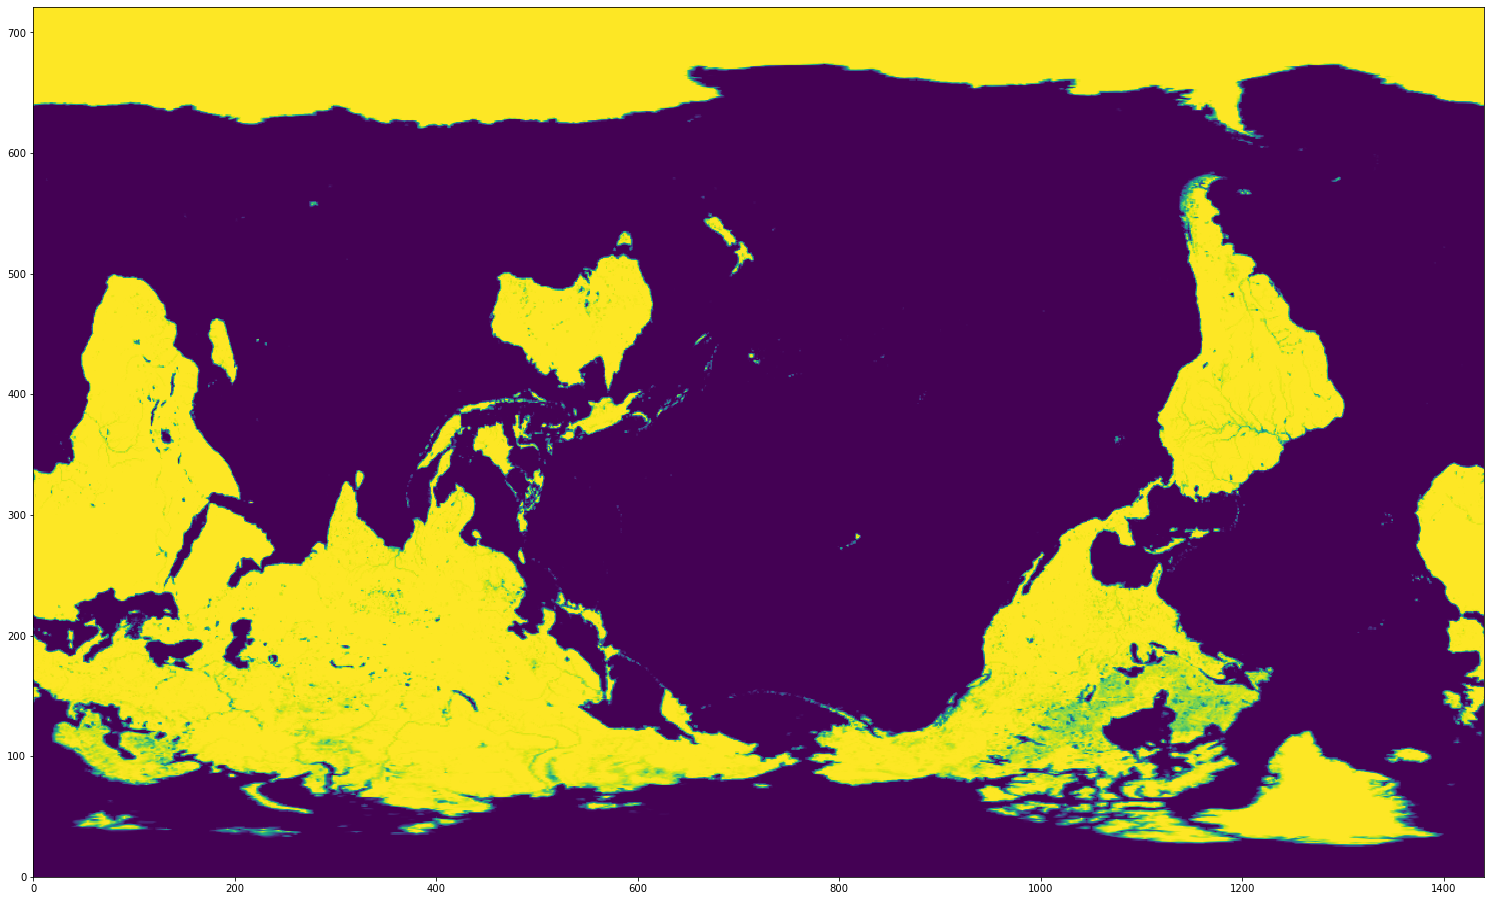

In [9]:
fig, axs = plt.subplots(figsize = (26,16))
plt.pcolormesh(sea_mask)

# Merge data

In [26]:
n_days = 365
n_samples = n_days * 4
n_var = 20
img_x_dim = 1440
img_y_dim = 721
year = 2022


#Create dataset
f = h5py.File(f'../../data/out_of_sample/{year}.h5', 'a')
data_year = f.create_dataset(name = "fields", shape = (n_samples, n_var, img_y_dim, img_x_dim), dtype = np.float32)

day_cnt = 0

for m in range(1,13):
    if m < 10:
        name = f"{year}0{m}.h5"
    else:
        name = f"{year}{m}.h5"
    
    #Load new data
    monthly_data = xr.open_dataset(f"../../data/test_2020_2022/{name}").fields
    monthly_days = monthly_data.shape[0]
    
    #Add data to complete data
    data_year[day_cnt:(day_cnt+monthly_days),...] = monthly_data
    day_cnt += monthly_days
    print(f"Month {m} added")

f.close()

Month 1 added
Month 2 added
Month 3 added
Month 4 added
Month 5 added
Month 6 added
Month 7 added
Month 8 added
Month 9 added
Month 10 added
Month 11 added
Month 12 added


# Analyze merged data

In [27]:
# Open 2018 dataset
new = xr.open_dataset("../../data/out_of_sample/2021.h5").fields
ref = xr.open_dataset("../../data/out_of_sample/2018.h5").fields

In [28]:
# Test mean over one grid point
mean_ref = ref.isel(phony_dim_2 = 50, phony_dim_3 = 50).mean(dim = "phony_dim_0")
mean_new = new.isel(phony_dim_2 = 50, phony_dim_3 = 50).mean(dim = "phony_dim_0")

In [29]:
mean_ref

<xarray.DataArray 'fields' (phony_dim_1: 21)>
array([-7.7897918e-01,  1.7693007e-01,  2.7332593e+02,  1.0084381e+05,
        1.0088438e+05,  2.6530475e+02, -7.4890244e-01,  4.6392095e-01,
        6.8135614e+02,  1.6179022e+00,  1.0070486e+00,  1.3220578e+04,
        7.3880506e+00,  2.8240645e-01,  5.2113145e+04,  2.4345264e+02,
        1.9888114e+05,  6.2173897e+01,  7.5732216e+01,  8.4516687e+00,
        2.7455951e+02], dtype=float32)
Dimensions without coordinates: phony_dim_1

In [30]:
mean_new

<xarray.DataArray 'fields' (phony_dim_1: 20)>
array([-1.28208745e+00, -3.46679837e-01,  2.72470856e+02,  1.01029164e+05,
        1.01069828e+05,  2.64476868e+02, -1.34252715e+00, -1.31039560e-01,
        8.23079651e+02,  9.34509635e-01, -3.94214280e-02,  1.33183428e+04,
        4.63856983e+00, -1.79896355e+00,  5.20660859e+04,  2.42537643e+02,
        1.98191219e+05,  6.28373566e+01,  7.57405624e+01,  7.87125778e+00],
      dtype=float32)
Dimensions without coordinates: phony_dim_1

In [31]:
(mean_ref[0:20] - mean_new)/mean_ref[0:20] *100

<xarray.DataArray 'fields' (phony_dim_1: 20)>
array([-6.4585587e+01,  2.9594171e+02,  3.1283972e-01, -1.8380064e-01,
       -1.8381964e-01,  3.1204900e-01, -7.9265961e+01,  1.2824609e+02,
       -2.0800211e+01,  4.2239422e+01,  1.0391455e+02, -7.3948848e-01,
        3.7215240e+01,  7.3701215e+02,  9.0300813e-02,  3.7584037e-01,
        3.4690163e-01, -1.0671034e+00, -1.1021146e-02,  6.8674126e+00],
      dtype=float32)
Dimensions without coordinates: phony_dim_1